<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 4**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Aaron Li

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [22]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: The Game of Strife

Below, and at the [link here](http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png), you will find the board for the ***Game of Strife***, a simplified and slightly more depressing version of the [Game of Life](https://en.wikipedia.org/wiki/The_Game_of_Life). Here are some rules:

- Players begin at START and may choose to begin the game by either going to college (moving to the right from START) or starting a career (moving downward from START). Players then move along the game board in order of increasing tile number. 
    - If a player begins by going to college, then they start the game with -\$20,000. That is indeed negative money, to account for student loan debt.
    - If a player begins by starting a career, then they start the game with \$5,000.

<p> </p>

- At the beginning of a player's turn, they roll a fair 6-sided die, the outcome of which determines how many tiles they move forward.

<p> </p>

- When a player reaches a red square (tiles 9, 17 or 30), they must stop at that square for the rest of their turn, even if they would not have landed on the red square.
    - When a player stops on the CAREER tile after college (square 9), they are randomly assigned a career and salary from the possibilities: \$50,000, \$70,000, \$90,000, \$110,000, or \$130,000 (all with equal probability). The player's actual career is irrelevant to the game, but please make something up so you are emotionally invested in the game.
    - If a player starts a career at the beginning of the game, they are assigned a salary randomly from possibilities \$40,000, \$50,000, \$60,000, \$70,000, or \$80,000.
    - When a player stops on the HOUSE tile, they put a down payment on a house. This down payment is drawn randomly from the set \$25,000, \$40,000, \$55,000 or \$70,000.
    - When a player stops on the RETIRE tile, the player collects a pension equal to half their salary and then the game ends immediately.

<p> </p>

- When a player lands on or passes a PAYDAY square, they earn money equal to their salary.

<p> </p>

- When a player lands on a STRIFE square (1, 4, 7, 13, 18, 23 or 29 if they go to college, or 2, 7, 13, 18, 23 or 29 if they start a career immediately at the beginning of the game), they draw a STRIFE card. The STRIFE cards have the player earn \$5,000 or \$10,000, or lose \$1,000, \$2,000 or \$5,000.

<p> </p>

- Players can have negative money, which corresponds to being in debt.


<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png" style="width: 700px;"/>

**Part A:** Write code to simulate an entire game of the Game of Strife (with only one player). You may **not** have two separate routines for simulating the game, or a turn, depending on whether a player goes to college or starts a career at the beginning; both possibilities should be accounted for within your one set of codes.

Then run two ensembles of at least 10,000 games, one where the player starts by going to college, the other where the player starts a career immediately. Plot density histograms of the players' ending distributions of money on the same set of axes. Be sure to label your axes, include a legend and make your histogram box faces slightly transparent, so both sets of data are visible.

Text(0,0.5,'Frequency')

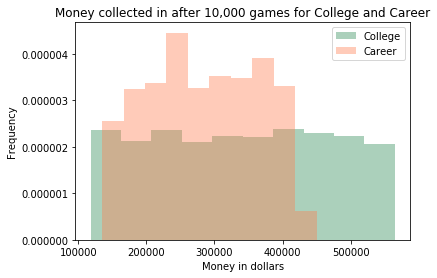

In [23]:
#Intialize the career salaries for both college for both college and noncollege
no_college_salaries={
    "pizza driver": 40000,
    "Level 1 crook" : 50000,
    "Level 15 hitman": 60000,
    "Level 30 boss": 70000,
    "Level 100 SwagLord": 80000
}

college_salaries={
    "Doctor": 50000,
    "Software Engineer" : 70000,
    "Teacher": 90000,
    "Cashier": 110000,
    "Mcdonalds Worker": 130000
}

def merge(name,choice):
    if choice==0:
        job=np.random.choice(list(college_salaries.keys()))
        income=college_salaries[job]
    else:
        job=np.random.choice(list(no_college_salaries.keys()))
        income=no_college_salaries[job]
    #Choose a random job based on path chosen
    Player={
        "Name": name,
        "Job": job,
       "Income": income,
        "Location": 0,
        "Status": choice,
        "Money":0,
        "Stop":0
    }
# Status determines college or career stops count how many stops someone has
    return Player
def strife():
    options=[5000, 10000,-1000,-2000,-5000]
    drawn=np.random.choice(options)
    #print("You landed on a Strife Tile! You gain/loss", drawn, "dollars")
    return drawn
def House():
    options=[-25000, -40000,-55000,-70000]
    drawn=np.random.choice(options)
    #print("You landed on a House Tile! You loss", drawn, "dollars")
    return drawn

def turn(Person):
    roll=np.random.choice(np.arange(1,7))
    Person["Location"]+=roll
    if Person["Status"]==0 and Person["Location"]<=9:
        if  Person["Location"]==1 or Person["Location"]==4 or  Person["Location"]==7:
            Person["Money"]+=strife()
    elif Person["Status"]==0 and Person["Location"]>=9 and Person["Stop"]==0:
        Person["Stop"]+=1
        Person["Location"]=9
        #stay at 9 for career
    elif Person["Status"]==1 and Person["Location"]<=9:
        if  Person["Location"]==2 or Person["Location"]==7:
            Person["Money"]+=strife()
        if Person["Location"]>=4 and Person["Stop"]==0:
            Person["Stop"]+=1
            Person["Money"]+=Person["Income"]
    else:
        if  Person["Location"]>=10 and Person["Stop"]==1:
            #print("You got paid!")
            Person["Stop"]+=1
            Person["Money"]+=Person["Income"]
        if  Person["Location"]>=16 and Person["Stop"]==2:
            #print("You got paid!")
            Person["Stop"]+=1
            Person["Money"]+=Person["Income"]
        if  Person["Location"]>=22 and Person["Stop"]==4:
            #print("You got paid!")
            Person["Stop"]+=1
            Person["Money"]+=Person["Income"]
        if  Person["Location"]>=27 and Person["Stop"]==5:
            #print("You got paid!")
            Person["Stop"]+=1
            Person["Money"]+=Person["Income"]
        if  Person["Location"]==10 or Person["Location"]==16 or  Person["Location"]==22 or Person["Location"]==22:
            Person["Money"]+=strife()
        if  Person["Location"]>=17 and Person["Stop"]==3:
            Person["Stop"]+=1
            Person["Money"]+=House()
            Person["Location"]=17
    #build up all possible cases!
    return Person
def game_of_strife(number_of_players, paths):
    names=[]
    choice=[]
    Players=[]
    #Intialze potential names and choice of college or career first
    for i in range(number_of_players):
        #print("Hello, Player",i+1,"What is your name?")
        #Change to i+1 so that it says hello player 1 instead of hello player 0
        names.append("Aaron")
        #print("Hi",names[-1]+"!", "Would you like to go to college or start your career?")
        x=paths
        if x.lower()=="college":
        #change to lower case to aviod bugs
            #print( "You chose college!")
            choice.append(0)
            Players.append(merge(names[-1],choice[-1]))
            Players[-1]["Money"]=-20000
            break
        else:
            #print( "You chose career!")
            choice.append(1)
            Players.append(merge(names[-1],choice[-1]))
            break
    #print("Congrats! You are a", Players[-1].get("Job"), "and you make", Players[-1].get("Income"))

    while Players[-1]["Location"]<30:
        Players[-1]=turn(Players[-1])
        #print("After turn",Players[-1]["Name"], "has",Players[-1]["Money"], "and is at", Players[-1]["Location"])
    Players[-1]["Money"]+=Players[-1]["Income"]/2
    return Players[-1]["Money"]

#Now simulate 10,000 games
money_college=[]
money_career=[]
for i in range(10000):
    money_college.append(game_of_strife(1, "college"))
    money_career.append(game_of_strife(1, "career"))
    
fig, ax = plt.subplots(1,1)
ax.hist(money_college, color="seagreen", alpha=.4, density=True)
ax.hist(money_career, color="coral", alpha=.4, density=True)
ax.legend(["College", "Career"])
ax.set_title("Money collected in after 10,000 games for College and Career")
ax.set_xlabel("Money in dollars")
ax.set_ylabel("Frequency")

**Part B:** Use concepts from class to describe the two distributions of player cash at retirement, depending on whether or not they went to college or immediately started a career. How are the two distributions similar? How do they differ? Address characteristics like skew, modality, central tendency and spread. How could the rules of the Game of Strife account for these differences?

**Part B Answer:**

The two distributions are not very similar. The career graph is unimodal and has an almost unifrom distribution where as the college graph is multimodal.The career graph being unimodal is due to the fact the each career job is only 10,000 dollars different causing a less drastic change and because of smaller difference in income, there are more incomes that lean towards 20,000 and 40,000 dollars (i.e central tendency).

College on the other hand had a much more drastic difference in income between jobs with 20,000 dollars causing multiple means to appears and showing distinct differences jobs. For the graph in colleges you can clearly see 5 peaks which correspond to the 5 different jobs and their means.

The way the two graphs are similar is besides the 5 peaks in the college graph both graphs seems to have some resemblence to a uniform distribution. 

**Part C:**  Use your results from Part A to estimate the probability that a person would retire with at least \$300,000, if they went to college.

In [24]:
percent_300=[i for i in money_college if i >= 300000]
percent_300=(len(percent_300)/10000)*100
print("There is a", percent_300, "% chance that you have 300,000 dollars after going to college")

There is a 59.99 % chance that you have 300,000 dollars after going to college


**Part D:** The United States [Bureau of Labor Statistics](https://www.bls.gov/news.release/hsgec.nr0.htm) has found that approximately 66.7% of students go to college. Suppose players of the Game of Strife choose to go to college at the beginning of the game with this probability of $P(\text{college}) = 0.667$.

Use your two ensembles of games from Part A to estimate the probability that an individual, whose college education status is unknown, will retire in the Game of Strife with at least \$300,000. State any relevant probability laws, theorems or rules that you use, and show all calculations.

**Part D Answer:** We shall use LTP. $$P(\$300,000|Path_{unknown})=P(\$300,000|college)P(college)+P(\$300,000|career)P(career)$$
$P(\$300,000|college)=.5969$, $P(\$300,000|career)=.4031$, $P(college)=.677$, $P(career)=.333$

so, $P(\$300,000|Path_{unknown})=0.5323646$ or $\approx$ 53.24\%

**Part E:** Let's see how important the Strife tiles are in affecting a player's final money. What is the probability that a player ends the game with at least \$300,000 in cash if they landed on at least one Strife square? You may want to modify your previous codes to run additional simulations for this part. Use the same method as Part D to address the proportion of players who begin by going to college versus starting a career.

In [25]:
one_strife=[]
for i in range(10000):
    one_strife.append(strife())
money_college_with_strife=np.subtract(money_college,one_strife)
money_career_with_strife=np.subtract(money_career,one_strife)
percent_300strife=[i for i in money_college_with_strife if i >= 300000]
percent_300strife=(len(percent_300strife)/10000)*100
print("There is a", percent_300strife, "% chance that you have 300,000 dollars after going to college\
 with one guarenteed strife")

There is a 59.870000000000005 % chance that you have 300,000 dollars after going to college with one guarenteed strife


Since the probility of getting 300,000 dollars given at least one strife or no guraneteed strife did not change the 
proability very much of having 300,000 dollars we can use Part D to get the same answer of $\approx$ 53.24%

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

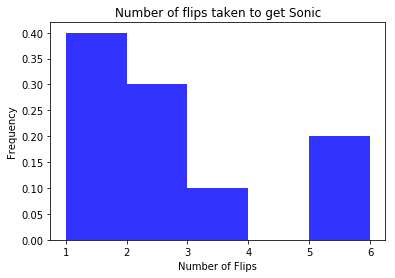

In [26]:
df = pd.read_csv("flipadelphia.csv",header=None)
coin_flips=[]
flips=df[0]
amount_of_flips=len(flips)
for i in range(amount_of_flips):
    coin_flips.append(flips[i])
my_bins=[1,2,3,4,5,6]
fig, ax = plt.subplots(1,1);
ax.hist(coin_flips, color="blue", alpha=.8, density=True,bins=my_bins);
ax.set_title("Number of flips taken to get Sonic");
ax.set_xlabel("Number of Flips");
ax.set_ylabel("Frequency");

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

In [27]:
def geometric(flips,prob):
    chance=[]
    for i in(coin_flips):
        chance.append((prob)*((1-prob)**(i-1)))
    total_chance=np.math.factorial(10)*np.prod(np.array(chance))
    #since the flips can be in any order we use factorial to have total chance
    return total_chance
print("When the probability is .5 there is a", str(100*geometric(coin_flips,.5))+"%", " chance it is a fair coin")

When the probability is .5 there is a 43.2586669922%  chance it is a fair coin


**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

0.4 0.49696888791


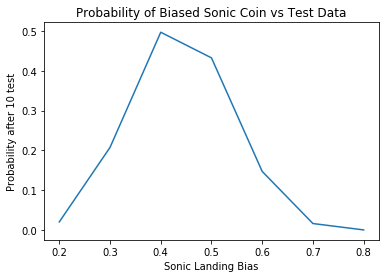

In [28]:
p_s=[.2,.3,.4,.5,.6,.7,.8]
all_probs=[]
for i in(p_s):
    all_probs.append(geometric(coin_flips,i))
max_coin_prob = max(all_probs)
coin_val = all_probs.index(max_coin_prob)
coin_val=p_s[coin_val]
plt.plot(p_s,all_probs)
plt.xlabel("Sonic Landing Bias")
plt.ylabel("Probability after 10 test")
plt.title("Probability of Biased Sonic Coin vs Test Data");
print(coin_val, max_coin_prob)

The _maximum a posteriori_ is Sonic with a .4 to land with a proability of approximately 50%.

**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

In order to be a valid pmf the sum of all pdf's must equal 1. So, $$1=m(.2)+m(.3)+m(.4)+m(.5)+m(1-.6)+m(1-.7)+m(1-.8)=2.3m->m=\frac{1}{2.3} $$

**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

The difference between the triangular prior distribution and the uniform prior distribution is that in a uniform distribution all biased coins had the same possibility of landing while the triangular distribution doesn't. In this case, the triangular distibution has the highest probability of choosing .5 being $\frac{.5}{2.3}$ and then the probability goes down by $\frac{.1}{2.3}$ as you go up or down in bias for the sonic coin. 

For example, The uniform prior distribution could have meant that Amy has one of each different possible biased sonic coins while the triangular prior distribution means should could have had 5 $.5$ sonic coins, 4 $.4$ and $.6$ sonic coins, 3 $.3$ and $.7$ sonic coins, and 2 $.2$ and $.8$ sonics coins. 

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

[ 0.08695652  0.13043478  0.17391304  0.2173913   0.17391304  0.13043478
  0.08695652]
0.5 0.0940405804178


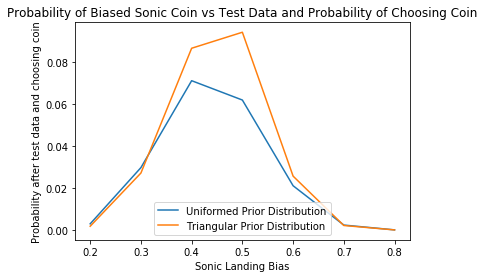

In [29]:
tri=[.2,.3,.4,.5,.4,.3,.2]
triangular=np.multiply(tri,(1/2.3))
print(triangular)
all_probs_uni=np.multiply(all_probs,1/7)
all_probs_tri=np.multiply(all_probs,triangular)
plt.plot(p_s,all_probs_uni)
plt.plot(p_s,all_probs_tri)
plt.xlabel("Sonic Landing Bias")
plt.ylabel("Probability after test data and choosing coin")
plt.title("Probability of Biased Sonic Coin vs Test Data and Probability of Choosing Coin");
plt.legend(["Uniformed Prior Distribution","Triangular Prior Distribution"],loc="lower center");
max_coin_prob_tri = max(all_probs_tri)
coin_val_tri = np.where(all_probs_tri==max_coin_prob_tri)
coin_val_tri=p_s[coin_val_tri[0][0]]
print(coin_val_tri, max_coin_prob_tri,)

**Part G:** Comment on the effect of your choice of different prior distribution on your posterior inference for the most probable coin bias.

After changing to a triangular distribution, the posterior inference for the most probable coin became .5 because it has the largest peak/ greatest frequency. This is due to the fact the fair sonic coin had the highest probability of being chosen out of all of the biased coins giving it a bigger boost in chance.

<br>

---
[Back to top](#top)
<a id='bot'></a>